<a href="https://colab.research.google.com/github/Swami-Siva-Rama-Raju/ML-Algorithms-Projects/blob/main/Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Hierarchical Clustering:**
---
Hierarchical Clustering is an unsupervised learning algorithm used for grouping data points based on their similarity. Unlike other clustering techniques like K-Means, it does not require you to pre-specify the number of clusters.Instead, it creates a tree-like structure (called a dendrogram).




#**Dendogram:**

---
A dendrogram is a tree-like diagram used in hierarchical clustering to show how data points are grouped into clusters. The bottom of the tree represents individual data points, and as you move up, it shows how these points are combined into clusters. You can cut the tree at different levels to choose the number of clusters you want. It's a visual tool to understand how clusters are formed step by step.

#**Types of Hierarchical Clustering:**
---
1. **Agglomerative Clustering (Bottom-up):**
    *   Starts with each data point as a separate cluster and successively merges them based on similarity.
2. **Divisive Clustering (Top-down):**
    *  Starts with all data points in one cluster and successively splits them into smaller clusters.

#**Agglomerative Clustering**
---
Agglomerative clustering is the most common type of hierarchical clustering. It follows a bottom-up approach, where each data point starts as its own cluster, and pairs of clusters are merged step by step based on their similarity until all data points belong to a single cluster.

#**Algorithm Steps:**
1. Treat each data point as a cluster.
2. Compute the distance matrix (the similarity between each pair of data points).
3. Merge the two clusters that are closest.
4. Repeat until there is only one cluster left.

The result is a dendrogram, which can be cut at different levels to form different numbers of clusters.

#**Divisive Clustering**
---
Divisive clustering follows a top-down approach, where all data points start in a single cluster. The algorithm splits the data repeatedly until each data point is in its own cluster.

#**Algorithm Steps:**
1. Start with all data points in one cluster.
2. Use a flat clustering method like K-Means to split the cluster into smaller clusters.
3. Repeat until every data point is a separate cluster.

#**Distance Calculation in Agglomerative Clustering**
---
In Agglomerative Clustering, there are different ways to measure the distance between clusters. Here are the main types:

1. **Single Linkage**: Merges clusters based on the shortest distance between points in two clusters. It can create long, chain-like clusters.

2. **Complete Linkage**: Merges clusters based on the longest distance between points in two clusters. It tends to form compact, tight clusters.

3. **Average Linkage**: Merges clusters based on the average distance between all points in two clusters. It balances between single and complete linkage.

4. **Ward's Method**: Merges clusters by minimizing the increase in variance. It usually creates clusters of similar size.

Each method affects the way clusters are formed and can give different results.

---

#**Project**

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

**Importing Dataset**

In [2]:
mall_csv = pd.read_csv('/content/drive/MyDrive/KMeans/Mall_Customers.csv')

**Understanding Dataset**

In [3]:
mall_csv.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mall_csv.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
mall_csv.shape

(200, 5)

**Data Preprocessing**

In [7]:
mall_csv.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
mall_csv.duplicated().sum()

0

In [9]:
#Choosing necessary features
X = mall_csv.iloc[:, 3:].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Creating Dendrograms using different methods**

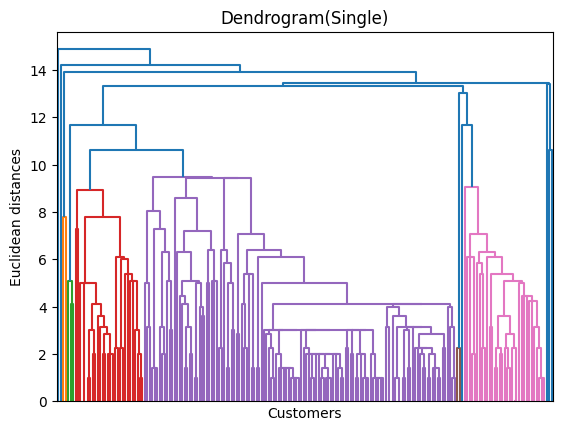

In [10]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single',metric='euclidean'),no_labels = True)
plt.title('Dendrogram(Single)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

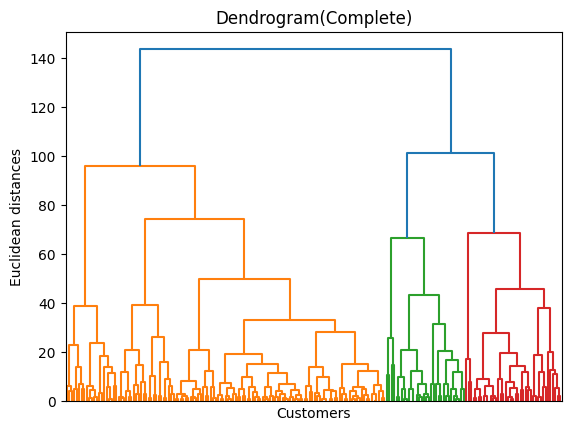

In [11]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete',metric='euclidean'),no_labels = True)
plt.title('Dendrogram(Complete)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

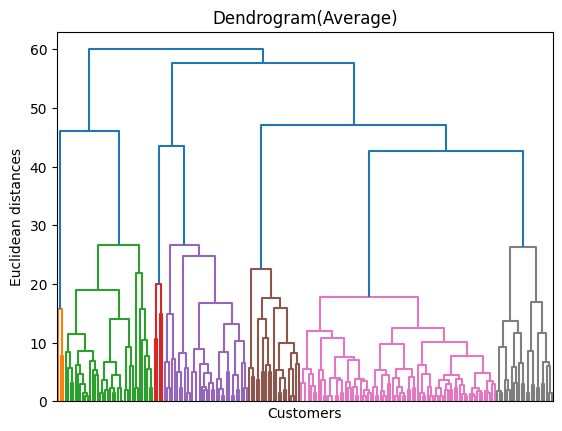

In [12]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),no_labels = True)
plt.title('Dendrogram(Average)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

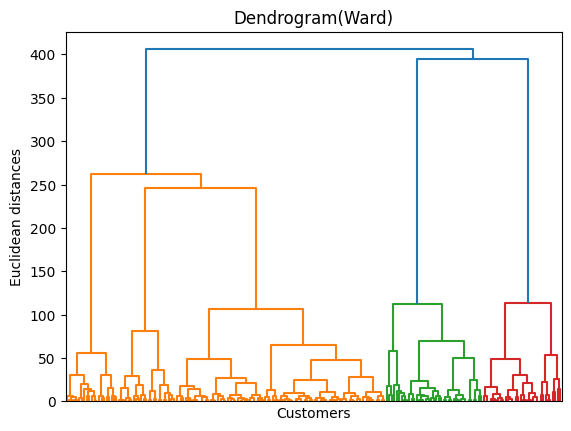

In [13]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),no_labels = True)
plt.title('Dendrogram(Ward)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**Building Model**

In [14]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
hc.fit(X)

AgglomerativeClustering(n_clusters=5)

In [15]:
y_hc = hc.fit_predict(X)

In [16]:
#silhouette score
score = silhouette_score(X, y_hc)

In [17]:
print("Silhouette Score is :",score)

Silhouette Score is : 0.5529945955148897


**Visualising the clusters**

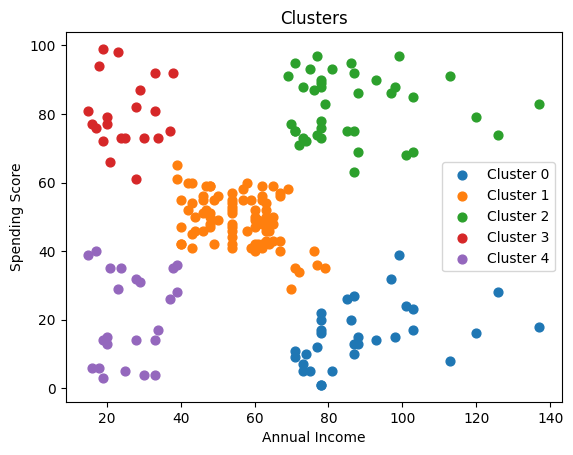

In [18]:
for i in range(hc.n_clusters_):
    plt.scatter(X[hc.labels_ == i, 0], X[hc.labels_ == i, 1], s=40, label='Cluster ' + str(i))
plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()